0 Clustering: The K-means Clustering
-------------------
In this session, you are going to get yourself familiar with the **unsupervised** classification. It is named as **unsupervised** because there is no **label** in the dataset indicating the pattern of classes within the dataset. And the classification results solely depend on how the classification algorithms explore the dataset. For instance, data points adjacent to each other can be treated as from one class. Even for such simple formalization, there can already be many ways to characterize the adjacency. The simplest way is to measure the Euclidean distance between the data points in the feature space and **cluster** the adjacent data points into classes. The **K-means** is an algorithm can help you to achieve this. The **K_means** is thus used as the starting point of **unsupervised** classification. Apart from the **K-means**, there are also **Gaussian Mixture** models that try to impose multi-modal *Gaussian* distributions upon the data points in the feature space, which also **cluster** the data points into classes according in terms of probability. For your information, these few algorithms including the **K-means** and **Gaussian Mixture** all fall into the **expectation maximization** (**EM**) family of algorithms. So, if you are interested in them, please do explore further background information about the **EM**s. However, it is not possible to cover all of them in this session. More details can be found in **[Pattern Recognition and Machine learning](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)**, Chapter 9, by Chris Bishop.

You will be using the GIS and Remote Sensing dataset of real world land use and land cover (LULC) types in the Netherlands for the practice of **unsupervised** clustering. But to get started, you will first look at some artificially generated data, which I call the dummy dataset. It is always quite advantageous to use dummy dataset. First, you can simulate different situations. And then, you know the nature of the dataset and it will be easy for you to evaluate the performance of algorithms, such as the **K-means**, in capturing that nature. After going through the rationale of the **K-means**, you will work on your GIS and Remote Sensing dataset to evaluate the performance of the algorithms on real dataset. The structure of this session can be summarized as:

- 0.0 K-means on dummy dataset
- 0.1 K-means through existed modules in Sklearn
- 0.2 The K-means on real world GIS and Remote Sensing datasets
- 0.3 Accuracy assessment

In this notebook, the first two sections are involved. These two sections are based on a dummy dataset with two dimensions, which means the **K-means** will be deployed in a 2-dimensional feature space. The first section depends only on the most frequenlty used modules of ***Numpy*** and ***Matplotlib***, hence, you won't bother with many modules in understanding the basics. In another notebook, the real world remote sensing datasets involve pixel values from multiple spectral bands, which means each pixel is characterized by multiple spectral values, thus the **K-means** classifies the pixels in a feature space with higher dimensions. 


### 0.0 K-means on dummy dataset

Here, you will first look at few data points in a dummy dataset in a low dimensional feature space. This will ensure the entire classification/clustering procedure easy to be visualized and understood. A 2-dimensional dummy dataset is generated for you. It means that each data point in the dataset is characterized by two values and can be represented in a 2-dimensional feature space, where you will apply your classification algorithms, the **K-means**.

In [1]:
# In order to plot figures inline in Jupyter Notebook, 
# we need to run this. But please ignore this in Colab.
%matplotlib inline

You are not going to be bothered with too many packages/modules. The entire K-means demonstration will only depend on two modules: Numpy and Matplotlib.

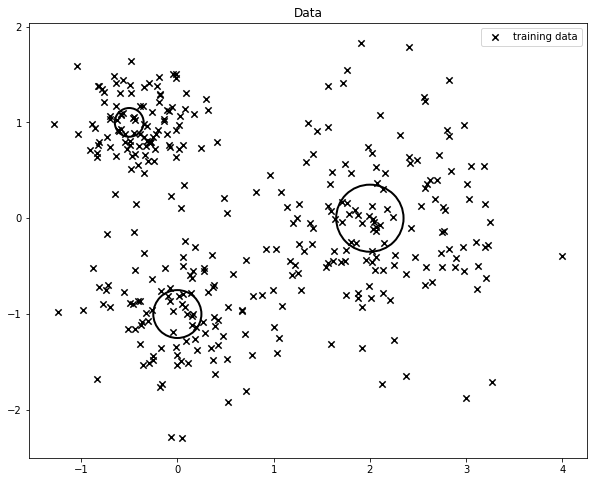

In [10]:
import matplotlib.pyplot as plt
import numpy as np


# Create dummy dataset containing 350 2-dimensional data points.
# Try to figure out how does the code work.
points = np.vstack(((np.random.randn(150, 2) * 0.7 + np.array([2, 0])),
                  (np.random.randn(100, 2) * 0.3 + np.array([-0.5, 1.0])),
                  (np.random.randn(100, 2) * 0.5 + np.array([0.0, -1.0]))))

# Visualize the dummy dataset.
# As you could tell, there are roughly 3 clusters of 2-dimensional data points highlighted by the circles.
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
ax = plt.gca()
ax.add_artist(plt.Circle(np.array([2, 0]), 0.7/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([-0.5, 1.0]), 0.3/2, fill=False, lw=2))
ax.add_artist(plt.Circle(np.array([0.0, -1.0]), 0.5/2, fill=False, lw=2))
plt.title('Data')
plt.legend()

Try to understand the procedure of the K-means: initiate randome centroids, and updating the centroids and thus data clusters. You can initialize some random centroids by using existing data points. To start, you need to identify the number of centroids: k. Here we start with 3 as visualized above.

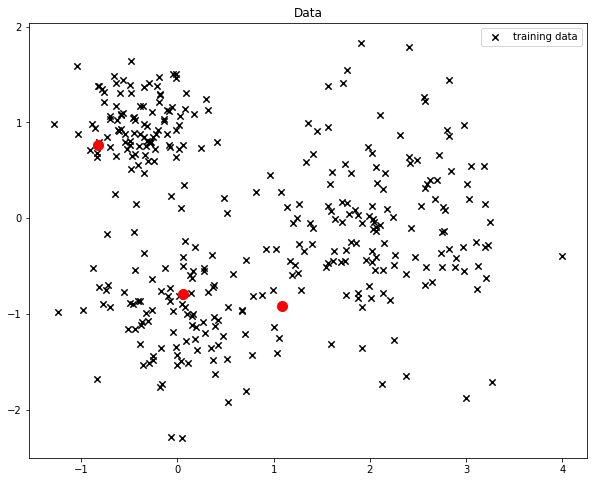

In [11]:
# Do also experiment with other numbers.
k = 3

# Then, choose k data points randomly as the initial centroids.
centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]  # And choose the first k data points in the shuffled dataset as initialized centroids.

# You can also plot to visualize the initialization
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c='k', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# Try to run this section of code for few more times to see the randomization.

As can be seen above, the random initialized centroids are obviously not optimal. But we will continue to assign data points to their closest centroids to form the clusters. During this simple clustering procedure, for each of the data points, you need to first compute its distance to each centroid. Then you assign each data point to the centroid index closet by. Please try to ***print*** out the variables below to see how such information is acquired and stored.

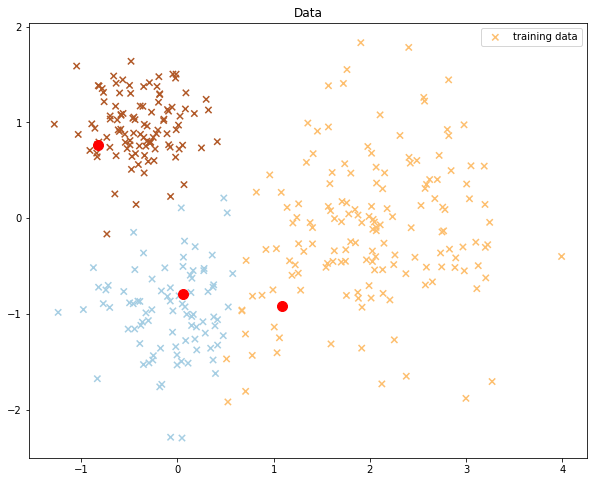

In [12]:
# First, you need to compute the distance between each point and each centroid.
# Thus, for each of the data points you will have three distances to the three initialized centroids.
distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))

# Now, for each of the data points, find the index of the closest centroid, pleast print it out and see how they look like.
closest_ind = np.argmin(distances, axis=0)

# You can visualize the initialized clusters. Do they make sense?
plt.figure(figsize=(10,8))
# You can also try to color the data points by their centroid/cluster index
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

Once you have assigned the data points into their closest centroids, you have your first clusters. What you need to do is updating the random centroids to the center/mean of the new clusters.

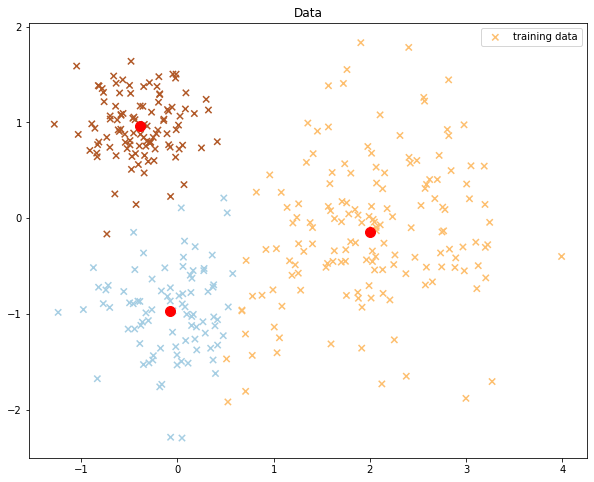

In [13]:
centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])

# You can visualize the updated centroids. Do you see the difference?
plt.figure(figsize=(10,8))
# You can also try to color the data points by their centroid/cluster index
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

# You can simply run and re-run this few lines of codes including distance computation and centroids update to see how centroids can be continuously updated.

Intuitively, you may want to again assign all data points to the new and corresponding centroids, expecting that the new centroids will be dragging the clusters to [maximize the distance between centroids](https://stats.stackexchange.com/questions/81481/why-does-k-means-clustering-algorithm-use-only-euclidean-distance-metric/81494#81494).
Repeating this procedure for few times would lead the movements of centroids converge and the final proper clusters. Hence, we can also wrap these few lines of code in a ***for loop*** to see how centroids converge in few iterations.

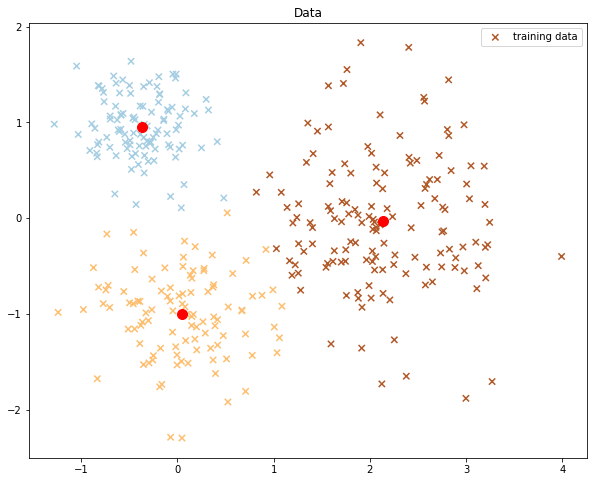

In [17]:
centroids = points.copy()  # Copy the dataset
np.random.shuffle(centroids)  # Shuffle the dataset
centroids = centroids[:k]

iterations = 5
for i in range(iterations):
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    closest_ind = np.argmin(distances, axis=0)
    centroids = np.array([points[closest_ind==k].mean(axis=0) for k in range(centroids.shape[0])])
    
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
plt.title('Data')
plt.legend()

Let's try to wrap-up all the codes into functions. We can then call these functions as if we are clicking buttons in a software to accomplish the clustering task. Please re-run the next two cells to see how random initialized centroids are updated, and so are the clusters. And also try to go back to check the code for details and recall how we arrived here.

In [18]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

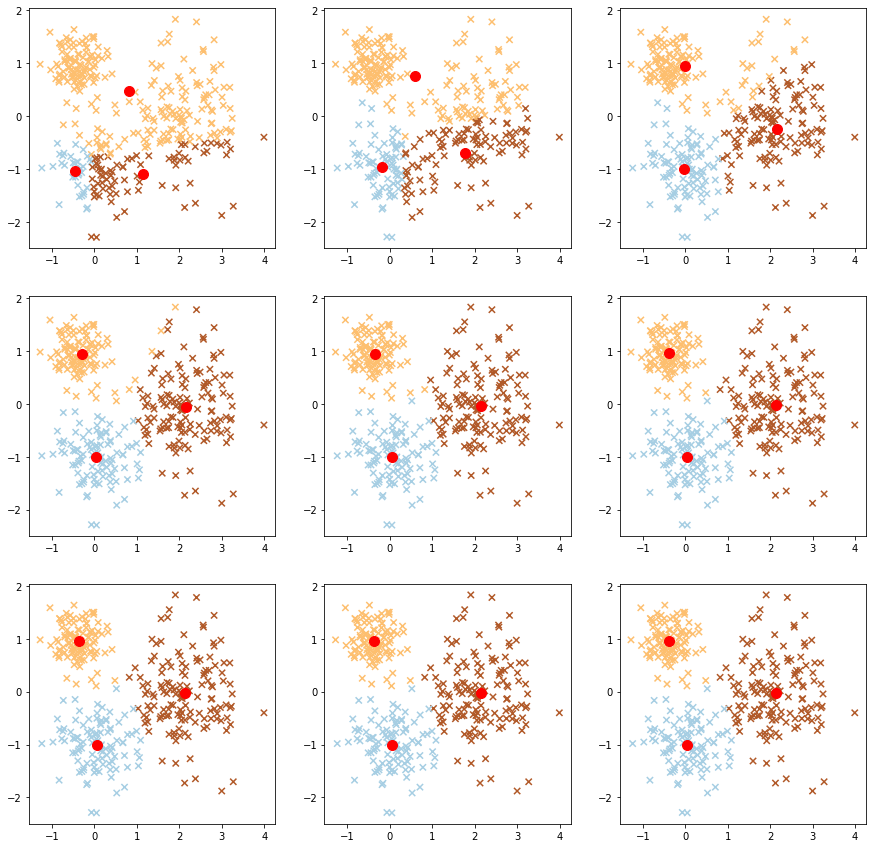

In [20]:
# Try to call your function, and inspect how centroids are updated.
centroids = initialize_centroids(points, 3)

# We can of course visualize how centroids are updated throughout the process.
fig = plt.figure(figsize=(15,15))
for i in range(9):
    closest_ind = closest_centroid(points, centroids)
    centroids = move_centroids(points, closest_ind, centroids)
    plt.subplot(3, 3, i+1)
    plt.scatter(points[:, 0], points[:, 1], s=40, c=closest_ind, cmap='Paired', marker='x', label='training data')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=100)
    

### 0.1 K-means through existed modules in Sklearn.

In fact, today, you don't have to implement the **K-means** by yourself if you only want to apply it to your dataset. The ***sklearn*** module has already implemented the **K-means** for you, and you can directly use the clustering functionality by calling the functions within the module. Please compare the results with those you obtained above.

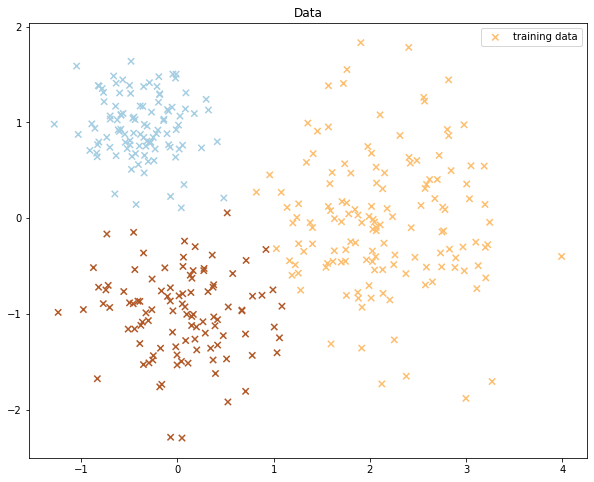

In [21]:
# Let's try the 'sklearn' on our artifical dataset.

from sklearn import cluster

kmean_cluster = cluster.KMeans(n_clusters=3)  # This is a function to be fitted to the data, please also choose the number of clusters.
labels = kmean_cluster.fit_predict(points)  # Fitting the data

# Try to inspect what exactly is stored in the resultant variables. For instance, what is the 'kmean_cluster'?

# Now all the data points are labelled, you can again visualize the clusters by using the 'labels' just as you did with the 'closest_ind'.
plt.figure(figsize=(10,8))
plt.scatter(points[:, 0], points[:, 1], s=40, c=labels, cmap='Paired', marker='x', label='training data')
plt.title('Data')
plt.legend()